In [2]:
with open('texts.txt', 'r', encoding='utf-8') as f:
    texts = [line.strip() for line in f]

In [3]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [4]:
with open('test_texts.txt', 'r', encoding='utf-8') as f:
    test_texts = [line.strip() for line in f]

In [5]:
test_texts[0]

"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in."

In [6]:
with open('test_labels.txt', 'r', encoding='utf-8') as f:
    test_labels = [line.strip() for line in f]

In [7]:
with open('labels.txt', 'r', encoding='utf-8') as f:
    labels = [line.strip() for line in f]

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = BeautifulSoup(text, "html.parser").get_text()

    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 1]

    return " ".join(tokens)


In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
x_train = [preprocess_text(text) for text in texts]
x_test = [preprocess_text(text) for text in test_texts]

In [15]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-07-01 05:57:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-01 05:57:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-01 05:57:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [16]:
import numpy as np

embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"Found {len(embedding_index)} word vectors in GloVe.")


Found 400000 word vectors in GloVe.


In [18]:
x_train[0]

'story man unnatural feeling pig start opening scene terrific example absurd comedy formal orchestra audience turned insane violent mob crazy chanting singer unfortunately stay absurd whole time general narrative eventually making putting even era turned cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future star sally kirkland frederic forrest seen briefly'

In [19]:
x_test[0]

'mr costner dragged movie far longer necessary aside terrific sea rescue sequence care character u ghost closet costners character realized early forgotten much later time care character really care cocky overconfident ashton kutcher problem come kid think he better anyone else around show sign cluttered closet obstacle appears winning costner finally well past half way point stinker costner tell u kutchers ghost told kutcher driven best prior inkling foreshadowing magic could keep turning hour'

In [20]:
y_train=labels
y_test=test_labels

In [21]:
y_train[0]

'0'

In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [23]:
y_test[0]

np.int64(0)

In [24]:
y_train[0]

np.int64(0)

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine training and test for consistent vocab
texts = x_train + x_test

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences
max_len = 200
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')


In [26]:
import numpy as np

embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

# Create embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((10000, embedding_dim))

for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=10000,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Freeze embeddings
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5283 - loss: 0.6861 - val_accuracy: 0.5741 - val_loss: 0.6667
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6239 - loss: 0.6451 - val_accuracy: 0.5466 - val_loss: 0.6716
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5521 - loss: 0.6746 - val_accuracy: 0.5210 - val_loss: 0.6892
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.5282 - loss: 0.6845 - val_accuracy: 0.5179 - val_loss: 0.6882
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5513 - loss: 0.6832 - val_accuracy: 0.5340 - val_loss: 0.6808
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.5502 - loss: 0.6756 - val_accuracy: 0.6898 - val_loss: 0.5956
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7050 - loss: 0.5739 - val_accuracy: 0.7975 - val_loss: 0.4545
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8167 - loss: 0.4153 - 

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train and store the history
history = model.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8494 - loss: 0.3513 - val_accuracy: 0.8520 - val_loss: 0.3374
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8613 - loss: 0.3266 - val_accuracy: 0.8519 - val_loss: 0.3385
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8704 - loss: 0.3051 - val_accuracy: 0.8557 - val_loss: 0.3260
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8722 - loss: 0.2990 - val_accuracy: 0.8572 - val_loss: 0.3220
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8858 - loss: 0.2753 - val_accuracy: 0.8604 - val_loss: 0.3210
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8891 - loss: 0.2661 - val_accuracy: 0.8650 - val_loss: 0.3125
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9037 - loss: 0.2393 - val_accuracy: 0.8655 - val_loss: 0.3125
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9088 - loss: 0.2293 - 

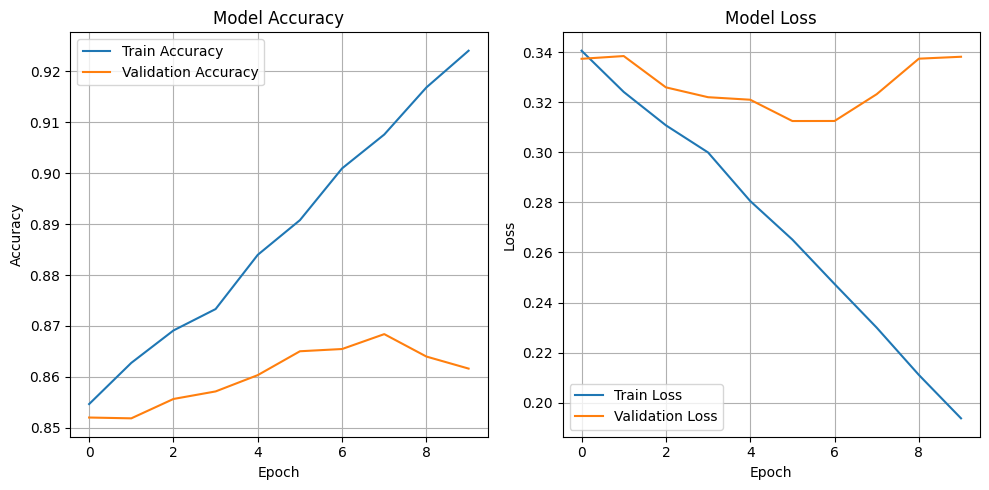

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [39]:
import numpy as np

y_pred_probs = model.predict(x_test_pad)

y_pred = (y_pred_probs > 0.5).astype(int)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test.astype(int)

print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86     12500
           1       0.84      0.89      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



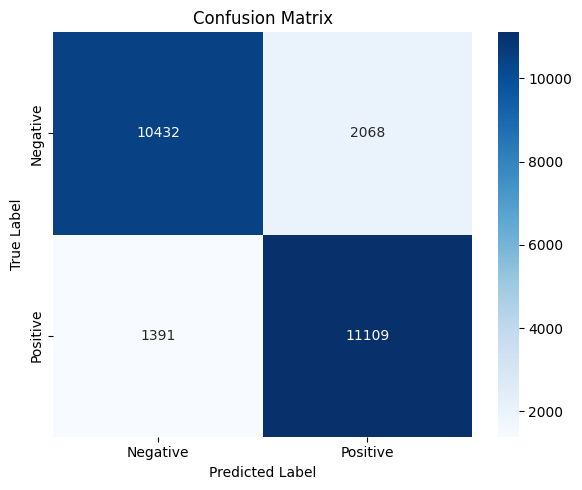

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9360 - loss: 0.1748 - val_accuracy: 0.8554 - val_loss: 0.3789
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9459 - loss: 0.1497 - val_accuracy: 0.8579 - val_loss: 0.3839
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9509 - loss: 0.1368 - val_accuracy: 0.8466 - val_loss: 0.4239
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9581 - loss: 0.1218 - val_accuracy: 0.8511 - val_loss: 0.4390
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9605 - loss: 0.1128 - val_accuracy: 0.8441 - val_loss: 0.5327
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9676 - loss: 0.0984 - val_accuracy: 0.8506 - val_loss: 0.4542
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9747 - loss: 0.0852 - val_accuracy: 0.8483 - val_loss: 0.5311
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9772 - loss: 0.0740 - 

In [43]:
import numpy as np

y_pred_probs = model.predict(x_test_pad)

y_pred = (y_pred_probs > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test.astype(int)

print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12500
           1       0.86      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000

